In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [44]:
data = pd.read_csv('sagehen_creek_2016_clean.csv')


//anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (3,5,7,9,11,13,15,17,19,21,23,25,27,31,33,35,37,39,41,47,51,53,55,57,73,75,77,79,81) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [45]:
noflag = data.filter(regex='^((?!_flag).)*$')
noflag = noflag.filter(regex='^((?!RECORD).)*$')
datalists = noflag.values.T.tolist()



24125


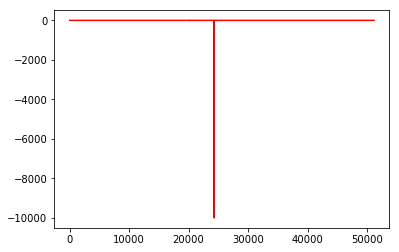

In [46]:

print(np.argmin(datalists[1]))

datalists[1][np.argmin(datalists[1])] = 0

plt.plot(np.arange(len(datalists[1])), datalists[1], 'r')

32.53
10010.77
-9999.0
-10011.38
[15740, 15813, 22408, 23668, 23685, 23688, 23734, 23735, 25393, 26478, 27358, 48469]


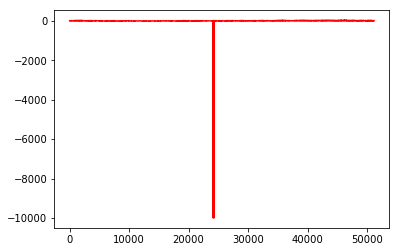

In [47]:
##TESTING BLOCK

temp = noflag.filter(items=['Avg_Air_Temp'])
templst = temp.values.T.tolist()[0]

##templst[0][22408] = (templst[0][22407] + templst[0][22409]) / 2 
##22408 = dropped to 0
##22124 = dropped to -9999

print(np.max(templst))
print(np.max(np.diff(templst)))
print(np.min(templst))
print(np.min(np.diff(templst)))

index = []
i = 0
for x in templst:
    if (x == 0):
        index.append(i)
    i += 1

print(index)
        

#templst[np.argmin(templst)] = 0
#print(templst[np.argmin(templst)+1])


plt.plot(np.arange(len(templst)), templst, 'r')



In [48]:
def filter_outliers(data, minimum, maximum):
    fil_indices = []
    old_values = []
    new_values = []
    
    lst = list(data)
    
    for i in range(0, len(lst)):
        if (lst[i] < minimum or lst[i] > maximum):
            fil_indices.append(i)
            old_values.append(lst[i])
            #if (i == 0):
            #    lst[i] = lst[i+1] + (lst[i+1] - lst[i+2])
            #elif (i == len(lst)-1):
            #    lst[i] = lst[i-1] + (lst[i-2] - lst[i-1])
            #else
            j = i+1
            while (lst[j] < minimum or lst[j] > maximum):
                j += 1
            lst[i] = 0.5 * (lst[i-1] + lst[j])
            new_values.append(lst[i])
            
    filtered = list(zip(fil_indices, old_values, new_values))
    
    return lst, filtered

In [49]:
def filter_outliers_destr(lst, minimum, maximum):
    while (np.min(lst) < minimum):
        error = np.argmin(lst)
        lst[error] = 0.5*(lst[error-1] + lst[error+1])
    while (np.max(lst) > maximum):
        error = np.argmax(lst)
        lst[error] = 0.5*(lst[error-1] + lst[error+1])
    

In [50]:
def filter_outliers_newlist(lst, minimum, maximum):
    new_lst = list(lst)
    
    while (np.min(new_lst) < minimum):
        error = np.argmin(new_lst)
        lst[error] = 0.5*(new_lst[error-1] + new_lst[error+1])
    while (np.max(new_lst) > maximum):
        error = np.argmax(new_lst)
        new_lst[error] = 0.5*(new_lst[error-1] + new_lst[error+1])
        
    return new_lst

In [51]:
def filter_spikes(data, min_roc, max_roc, toggle_nan=False):
    fil_indices = []
    old_values = []
    new_values = []
    
    lst = list(data)
    
    diff = np.diff(lst)
    i = 0
    while (i < len(diff)):
        if (diff[i] < min_roc):
            fil_indices.append(i+1)
            old_values.append(lst[i+1])
            drops = 1
            j = i + 1
            while (diff[j] == 0):
                fil_indices.append(j)
                old_values.append(lst[j])
                drops += 1
                j += 1
            if (toggle_nan):
                for k in range(i+1, j+1):
                    lst[k] = NaN
                    new_values.append(lst[k])
            else:
                slope = (0.5*(lst[j+1] - lst[i])) / drops
                for k in range(i+1, j+1):
                    lst[k] = lst[k-1] + slope
                    new_values.append(lst[k])
            i = j
        i += 1
    filtered = list(zip(fil_indices, old_values, new_values))
            
    return lst, filtered

In [54]:
#TESTING#

#start = time.time()
filter_outliers_destr(templst, -100, 100)
#end = time.time()

#start = time.time()
outliers = filter_outliers(templst, -100, 100)
#end = time.time()

#print(end-start)
#print(outliers)
     
newlst, drops = filter_spikes(templst, -3, 0)
print(drops)

[(22408, 0.0, 6.990500000000001), (25148, 3.865, 9.9), (25588, 4.687, 11.615), (26457, 9.81, 10.3775), (27178, 7.879, 13.175), (28894, 7.77, 20.994999999999997), (32604, 9.33, 13.23), (36676, 11.17, 12.31), (50823, 6.955, 15.780000000000001)]


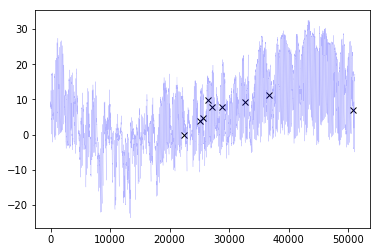

In [55]:
plot = list([[a for a,b,c in drops], [b for a,b,c in drops]])

plt.scatter([a for a,b,c in drops], [b for a,b,c in drops], c='black', marker='x', linewidth=1)
plt.plot(templst, 'b', alpha=0.3, linewidth=0.3)
plt.show()

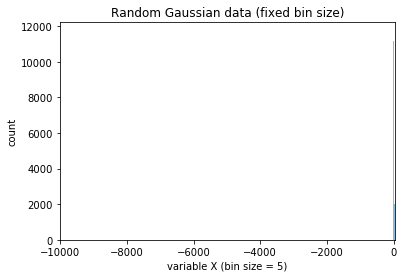

In [12]:
data = templst

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data)-5, max(data)+5])

plt.hist(data, bins=bins, alpha=0.5)
plt.title('Random Gaussian data (fixed bin size)')
plt.xlabel('variable X (bin size = 5)')
plt.ylabel('count')

plt.show()